# EDA: Diagnosing Diabetes



**Note**: This [dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database) is from the National Institute of Diabetes and Digestive and Kidney Diseases. It contains the following columns:

- `Pregnancies`: Number of times pregnant
- `Glucose`: Plasma glucose concentration per 2 hours in an oral glucose tolerance test
- `BloodPressure`: Diastolic blood pressure
- `SkinThickness`: Triceps skinfold thickness
- `Insulin`: 2-Hour serum insulin
- `BMI`: Body mass index
- `DiabetesPedigreeFunction`: Diabetes pedigree function
- `Age`: Age (years)
- `Outcome`: Class variable (0 or 1)



## Initial Inspection

1. The dataset [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

Expected data type for each column:

- `Pregnancies`: integer
- `Glucose`: integer
- `BloodPressure`: integer
- `SkinThickness`: integer
- `Insulin`: integer
- `BMI`: float
- `DiabetesPedigreeFunction`: float
- `Age`: integer
- `Outcome`: integer

2. Next, let's load in the diabetes data to start exploring.

   Load the data in a variable called `diabetes_data` and print the first few rows.
   
   **Note**: The data is stored in a file called `diabetes.csv`.

In [2]:
import pandas as pd
import numpy as np

# load in data
diabetes_data = pd.read_csv("diabetes.csv")
print(diabetes_data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age Outcome  
0                     0.627   50       1  
1                     0.351   31       0  
2                     0.672   32       1  
3                     0.167   21       0  
4                     2.288   33       1  


3. How many columns (features) does the data contain?

In [3]:
# print number of columns
print(len(diabetes_data.columns))

9


4. How many rows (observations) does the data contain?

In [5]:
# print number of rows
print(len(diabetes_data))

768


## Further Inspection

5. Let's inspect `diabetes_data` further.

   Do any of the columns in the data contain null (missing) values?

In [7]:
# find whether columns contain null values
print(diabetes_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


6. While it's technically true that none of the columns contain null values, that doesn't necessarily mean that the data isn't missing any values.
   
   To investigate further, calculate summary statistics on `diabetes_data` using the `.describe()` method.

In [8]:
# perform summary statistics
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


7. 
   - `Glucose`
   - `BloodPressure`
   - `SkinThickness`
   - `Insulin`
   - `BMI`

The minimum values for these columns cannot be 0. There are missing values. This also affects mean and median values. 

8. Do you spot any other outliers in the data?

The max values of pregnancies is 17 which is extreme. The same goes for insulin max value which is 846.

9. Let's see if we can get a more accurate view of the missing values in the data.


In [10]:
# replace instances of 0 with NaN
diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']] = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN)

10. Next, check for missing (null) values in all of the columns.

    Now how many missing values are there?

In [11]:
# find whether columns contain null values after replacements are made
print(diabetes_data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


11. Let's take a closer look at these rows to get a better idea of _why_ some data might be missing.

    Print out all the rows that contain missing (null) values.

In [13]:
# print rows with missing values
print(diabetes_data[diabetes_data.isnull().any(axis=1)])

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6    148.0           72.0           35.0      NaN  33.6   
1              1     85.0           66.0           29.0      NaN  26.6   
2              8    183.0           64.0            NaN      NaN  23.3   
5              5    116.0           74.0            NaN      NaN  25.6   
7             10    115.0            NaN            NaN      NaN  35.3   
..           ...      ...            ...            ...      ...   ...   
761            9    170.0           74.0           31.0      NaN  44.0   
762            9     89.0           62.0            NaN      NaN  22.5   
764            2    122.0           70.0           27.0      NaN  36.8   
766            1    126.0           60.0            NaN      NaN  30.1   
767            1     93.0           70.0           31.0      NaN  30.4   

     DiabetesPedigreeFunction  Age Outcome  
0                       0.627   50       1  
1                    

12. Go through the rows with missing data. Do you notice any patterns or overlaps between the missing data?

Insulin column has a lot of missing values. In most cases, the rows that have at least one missing value also seems to be missing the insulin value.

13. Next, take a closer look at the data types of each column in `diabetes_data`.

In [14]:
# print data types
print(diabetes_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    object 
dtypes: float64(6), int64(2), object(1)
memory usage: 54.1+ KB
None


14. To figure out why the `Outcome` column is of type `object` (string) instead of type `int64`, print out the unique values in the `Outcome` column.

In [15]:
# print unique values of Outcome column
print(diabetes_data.Outcome.unique())

['1' '0' 'O']


15. How might you resolve this issue?

There seems to be instances where 0 is recorded as 'O'. We can replace these instances and convert the data type to int64.

## Next Steps:

In [16]:
# counts of unique values, sorted by frequencies
print(diabetes_data.value_counts())

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            74.0     52.0           10.0           36.0     27.8  0.269                     22   0          1
4            117.0    64.0           27.0           120.0    33.2  0.230                     24   0          1
             111.0    72.0           47.0           207.0    37.1  1.390                     56   1          1
             110.0    76.0           20.0           100.0    28.4  0.118                     27   0          1
             109.0    64.0           44.0           99.0     34.8  0.905                     26   1          1
                                                                                                            ..
1            131.0    64.0           14.0           415.0    23.7  0.389                     21   0          1
             130.0    70.0           13.0           105.0    25.9  0.472                     22   0          1
      

In [17]:
# replacing the values with the median or mean of each column
# the median is often preferred over the mean as it is more robust to outliers

# calculate the median for each column, ignoring zeros
medians = diabetes_data[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']].replace(0, np.NaN).median()

# replace zeros with the median of each column
for column in ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']:
    diabetes_data[column] = diabetes_data[column].replace(0, medians[column])

Visualization is one of the most intuitive methods for identifying outliers. Common plots include:

- Histograms: Good for seeing the overall distribution and spotting any bars at the extreme ends of the scale.
- Boxplots: Specifically designed to show outliers as points outside the whiskers.
- Scatter plots: Useful if you want to see outliers in the context of two numerical variables.

c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


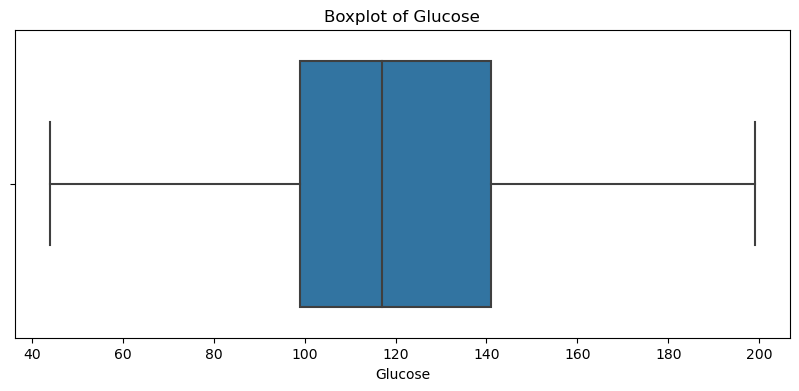

c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


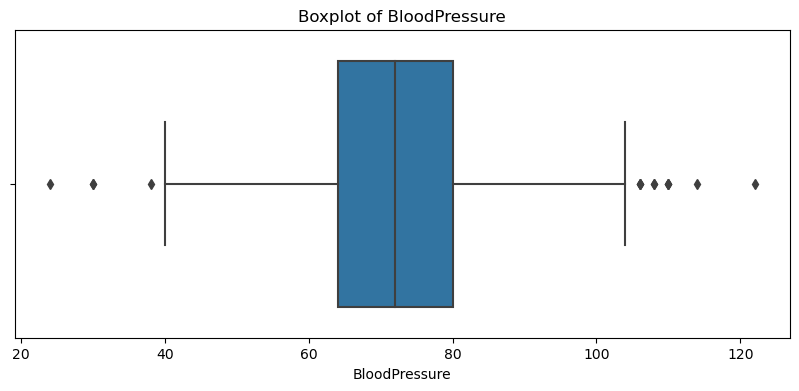

c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


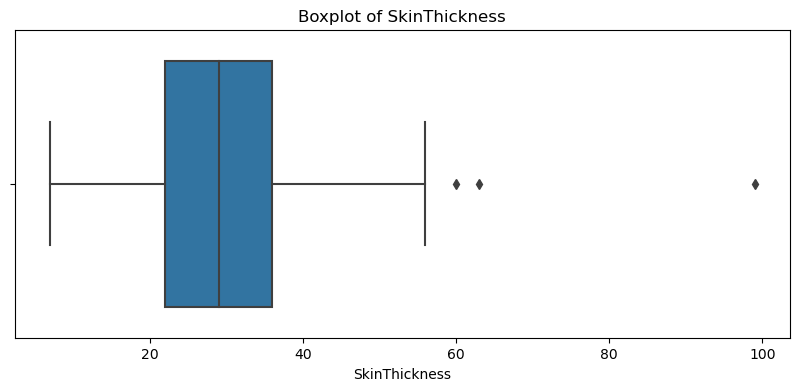

c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


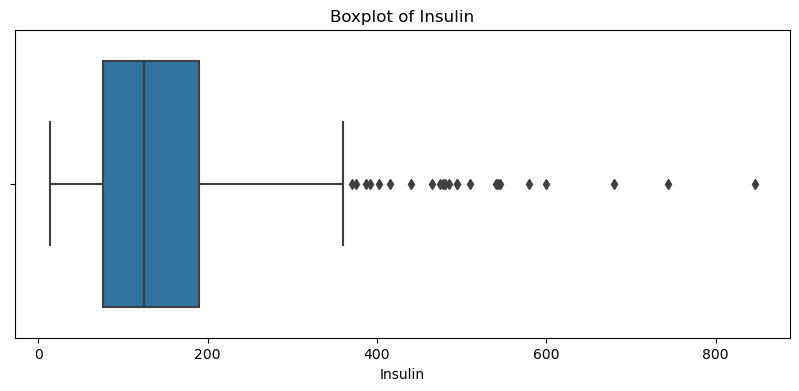

c:\Users\cescedes\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


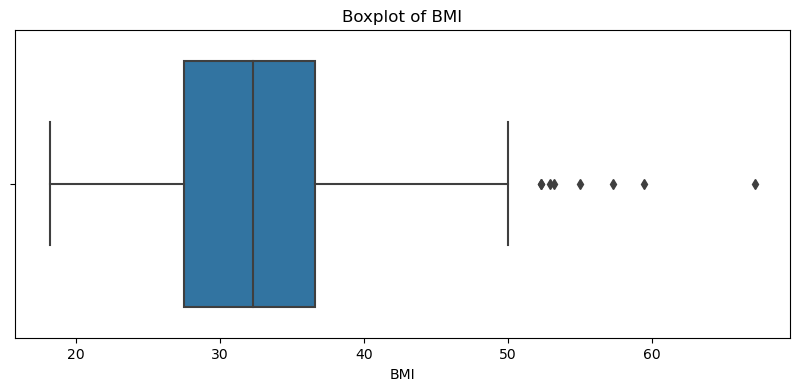

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# create boxplots for the columns
columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=diabetes_data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Statistical methods can help define outliers in terms of data points that deviate significantly from the statistical summary of the dataset.

- Standard Deviation: If the data is normally distributed, values that lie outside of 3 standard deviations from the mean can be considered outliers.
- Interquartile Range (IQR): Calculate the IQR (the difference between the 75th and 25th percentiles) and identify as outliers any points that fall below Q1 - 1.5 * IQR or above Q3 + 1.5 * IQR.

In [21]:
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for col in columns:
    Q1 = diabetes_data[col].quantile(0.25)
    Q3 = diabetes_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = diabetes_data[(diabetes_data[col] < lower_bound) | (diabetes_data[col] > upper_bound)]
    print(f"Outliers in {col}: {outliers.shape[0]}")


Outliers in Pregnancies: 4
Outliers in Glucose: 0
Outliers in BloodPressure: 14
Outliers in SkinThickness: 3
Outliers in Insulin: 24
Outliers in BMI: 8
Outliers in DiabetesPedigreeFunction: 29
Outliers in Age: 9
